[{'llegada': 6, 'tiempo_espera': 0, 'tiempo_uso': 6.508911371163603, 'caja_elegida': 1}, {'llegada': 3, 'tiempo_espera': 0, 'tiempo_uso': 1.4832027591886996, 'caja_elegida': 2}, {'llegada': 2, 'tiempo_espera': 0, 'tiempo_uso': 8.349652838647213, 'caja_elegida': 3}, {'llegada': 7, 'tiempo_espera': 0, 'tiempo_uso': 2.9971534093335386, 'caja_elegida': 4}, {'llegada': 1, 'tiempo_espera': 0, 'tiempo_uso': 3.4702287411533534, 'caja_elegida': 5}, {'llegada': 5, 'tiempo_espera': 1.5089113711636033, 'tiempo_uso': 5.5172720093658585, 'caja_elegida': 1}, {'llegada': 5, 'tiempo_espera': 0, 'tiempo_uso': 9.12409368134167, 'caja_elegida': 2}, {'llegada': 2, 'tiempo_espera': 6.349652838647213, 'tiempo_uso': 11.849587603983649, 'caja_elegida': 3}, {'llegada': 3, 'tiempo_espera': 0, 'tiempo_uso': 3.7493110667057845, 'caja_elegida': 4}, {'llegada': 2, 'tiempo_espera': 1.4702287411533534, 'tiempo_uso': 9.223279948162261, 'caja_elegida': 5}]
cliente llega en el tiempo 6 elige caja 1
cliente llega en el ti

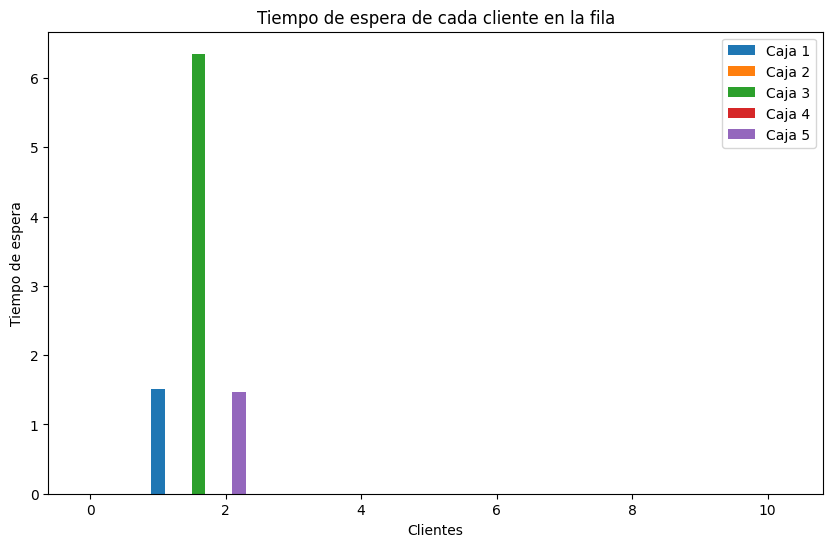

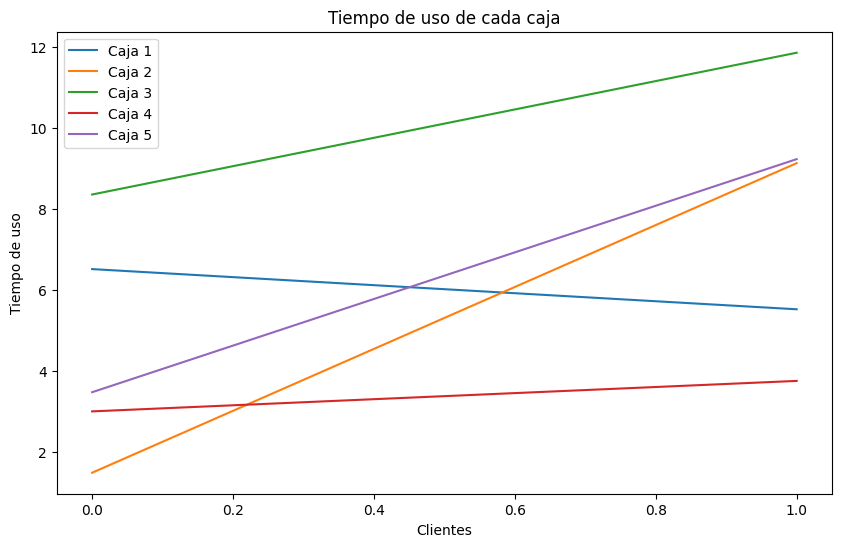

In [569]:
import numpy as np
import matplotlib.pyplot as plt

n = 10  # num usuarios
k = 3    # num cajas 
mu1 = 3  # media de distribución de llegadas de clientes
mu2 = 5  # media de distribución de tiempo de uso en caja
sigma2 = 3  # desviación estándar de distribución de tiempo de uso en caja
p = 0.4   # prob de pagar en efectivo
unica_cola = 0

# genera llegadas de clientes (usando distribución de Poisson)
llegadas = np.random.poisson(mu1, n)

#listas para almacenar los tiempos de cada caja
tiempo_uso_cajas = [[] for _ in range(k)]
tiempo_espera_filas_cajas = [[] for _ in range(k)]
tiempo_espera_unica_fila = []
tiempo_libre_cajas = [[] for _ in range(k)]
cola_general = []
tiempo_espera_en_cajas = []
# para graficos
indices = np.arange(n)

def generar_tiempo_uso_caja():
    tiempo_uso_caja = -1  
    while tiempo_uso_caja <= 0:
        tiempo_uso_caja = np.random.normal(mu2, sigma2)
    return tiempo_uso_caja

for i, llegada in enumerate(llegadas):
    # tiempo de uso de la caja
    tiempo_uso_caja = generar_tiempo_uso_caja()
    # medio de pago con bernoulli
    paga_en_efectivo = np.random.binomial(1, p)
    # calcula el tiempo de pago segun forma p
    # 2 minutos en efectivo, 70 seg en otro medio
    tiempo_pago = 2 if paga_en_efectivo else 1.16  
    tiempo_uso = tiempo_uso_caja + tiempo_pago
    #tiempo_espera_unica_fila = [tiempo_libre[-1] if tiempo_libre else 0 for tiempo_libre in tiempo_libre_cajas]
    #tiempo_espera_en_cajas = [tiempo_libre[-1] if tiempo_libre else 0 for tiempo_libre in tiempo_libre_cajas]
    tiempo_espera = 0
    
    if unica_cola:
        if any(tiempo_libre_cajas):  # Verifica si alguna de las sublistas tiene elementos
            caja_elegida = np.argmin(tiempo_libre_cajas)
        else:
            caja_elegida = 0 
    # Cálculo del tiempo de espera
        tiempo_espera = max(0, tiempo_libre_cajas[caja_elegida] - llegada)

    # Actualización de los tiempos
        tiempo_espera_unica_fila.append(tiempo_espera)
        tiempo_libre_cajas[caja_elegida].append(llegada + tiempo_uso)
        
        
    else:
        clientes_en_cajas = [len(tiempo_espera_filas_cajas[idx]) for idx in range(k)]
        caja_elegida = np.argmin(clientes_en_cajas)
        if len(tiempo_espera_filas_cajas[caja_elegida]) == 0:
            tiempo_espera = 0
        else:    
            ultimo_tiempo_espera = tiempo_espera_filas_cajas[caja_elegida][-1]
            ultimo_tiempo_uso=tiempo_uso_cajas[caja_elegida][-1]
            tiempo_espera = (ultimo_tiempo_uso + ultimo_tiempo_espera) - llegada if tiempo_espera_filas_cajas else 0    
            if tiempo_espera < 0:
                tiempo_espera = 0
        tiempo_espera_filas_cajas[caja_elegida].append(tiempo_espera)
        #tiempo_libre_cajas[caja_elegida].append(max(tiempo_libre_cajas[caja_elegida][-1] if tiempo_libre_cajas[caja_elegida] else llegada, llegada) + tiempo_uso)
        tiempo_libre_cajas[caja_elegida].append(llegada + tiempo_uso)


    # actualiza las listas de tiempos
    tiempo_uso_cajas[caja_elegida].append(tiempo_uso)

    cola_general.append({
        'llegada': llegada,
        'tiempo_espera': tiempo_espera,
        'tiempo_uso': tiempo_uso,
        'caja_elegida': caja_elegida + 1
    })

print(cola_general)    
# Función para graficar el tiempo de uso de cada caja
def graficoCajas():
    plt.figure(figsize=(10, 6))
    for caja in range(k):
        plt.plot(tiempo_uso_cajas[caja], label=f'Caja {caja + 1}')
    plt.title('Tiempo de uso de cada caja')
    plt.xlabel('Clientes')
    plt.ylabel('Tiempo de uso')
    plt.legend()
    plt.show()

# Función para graficar el tiempo de espera de cada cliente en la fila
def graficoEsperaClientes():
    plt.figure(figsize=(10, 6))
    bar_width = 0.2  # Ajusta el ancho de las barras según sea necesario
    bar_margin = 0.1  # Agrega un margen entre las barras
    if unica_cola:
        plt.bar(indices - 0.4, tiempo_espera_fila_unica[:len(indices)] + [0] * (len(indices) - len(tiempo_espera_fila_unica)), width=0.2, label='Tiempo de espera en la fila (única cola)')
    else:
        max_len = max(len(tiempo_espera_filas_cajas[x]) for x in range(k))
        for caja in range(k):
            x_positions = [i + (bar_width + bar_margin) * caja for i in range(n)]  # Ajusta las posiciones x con margen
            plt.bar(x_positions, tiempo_espera_filas_cajas[caja][:n] + [0] * (n - len(tiempo_espera_filas_cajas[caja])), width=bar_width, label=f'Caja {caja + 1}')
    plt.title('Tiempo de espera de cada cliente en la fila')
    plt.xlabel('Clientes')
    plt.ylabel('Tiempo de espera')
    plt.legend()
    plt.show()

def calcular_media_desviacion(arrayTiempos):
    #si esta vacia
    if not arrayTiempos:
        return None 

    media = np.mean(arrayTiempos)
    desviacion_estandar = np.std(arrayTiempos)

    return media, desviacion_estandar

def calcular_tiempo_libre(tiempo_libre_cajas, llegadas):
    
    tiempo_libre = [[] for _ in range(len(tiempo_libre_cajas))]

    for i in range(len(tiempo_libre_cajas)):
        tiempo_libre[i] = [llegadas[0]]

        for j in range(1, len(tiempo_libre_cajas[i])):
            tiempo_libre[i].append(tiempo_libre_cajas[i][j - 1])

    return tiempo_libre


# Imprimir información sobre cada cliente
for cliente in cola_general:
    print(f"cliente llega en el tiempo {cliente['llegada']} elige caja {cliente['caja_elegida']}")

# Imprimir listas de tiempo de espera para cada caja
#for caja in range(k):
    #print(f"Tiempo de espera en la fila de la Caja {caja + 1}: {tiempo_espera_filas_cajas[caja]}")

print("media y desviacion para timpos de uso de caja1")
print(calcular_media_desviacion(tiempo_uso_cajas[0]))

print("media y desviacion para timpos de espera caja1")
print(calcular_media_desviacion(tiempo_espera_filas_cajas[0]))
#print(calcular_media_desviacion(tiempo_espera_en_cajas))


tiempo_libre_cajas_calculado = calcular_tiempo_libre(tiempo_libre_cajas, llegadas)
for i, tiempos_libres in enumerate(tiempo_libre_cajas_calculado):
    print(f'Tiempos libres para Caja {i + 1}: {tiempos_libres}')

    
graficoEsperaClientes()
graficoCajas()
